# Introduction to Statistics

In order for us to apply anything in statistics we first need to speak the language of statistics.  With that in mind, in this notebook we are going to cover the following core concepts and vocabulary - <br>

<li>Basic definitions - Population and sampling  </li>
<li>Sampling distributions</li> 
<li>Standard Error   </li>


## Basic Definitions- Population and Sampling 

One of the most important concepts to understand in statistics is the concept of population. 

A population is typically a collection of information with at least one property being in common. For this lets take a simple example- take for example a dataset of people's weights.  We will call this population P. Say P is - <br>

[87,343,43,45,24,234,24,25,53,93] all in the units of pounds   <br>

A single number in the population P is called an element. In population P, the common property between each element is that each element represents the weight of a person. Without this similarity, it would be difficult for us to make any use of a population since we have nothing in common between each element of the population.

Let us now go to a more complex example. Time to go to our old friend the iris dataset- 

In [20]:
# Just run this code

from sklearn import datasets
import pandas as pd 

iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(data = iris.data, columns=iris.feature_names)
print("The size of the iris dataset is:",len(iris_dataframe), "elements long")
iris_dataframe.head()


The size of the iris dataset is: 150 elements long


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Solution code

```python
# Just run above code
```

Question: If we consider the iris dataset as a population, what do you think would be the common property of the population? What you you consider as a single element of the population? 

Answer: The common property of the iris dataset is the dataset is about flower measurements. Each row of the data has the same features- [sepal length , sepal width , petal length, petal width ]. We can safely assume that each entry in this dataset corresponds to the measurements of a flower. That also answers our section question- unlike the weights dataset where a single number was the element of the population, here a single row of the dataset is a single element of the population. 

Now that we have defined a population, we can start talking about sampling. Let us go back to our population P. We can break our population into smaller group of number. This process is called sampling. For example from P, if we pick two elements- <br> 

P = [87,343,43,45,24,234,24,25,53,93] <br>
Q  = [24, 53]

In statistical language we would say that Q is a sample of the population P. This is because Q contains a few elements of the population Q. 

Another example that may help you visualize this is imagine you have 100 balls in a bucket. The 100 balls in a bucket would be the population. Selecting 20 balls from that bucket is the process of sampling from the population, and the collection of 20 balls would be called a sample of the population. 

So the process of sampling from the population can be done in really two ways- Random sampling and Non random sampling.  Random sampling is when we pick sample from the population at random. What I did in generating Q was an example of random sampling, where I just decide, let me pick two elements from the population and create the sample Q. The point is that there was no bias in picking those numbers. I did not for example pick two number that were next to each other because they were next to each other. Or did not say that I want to pick the largest number and the smallest number and generate a sample out of them, that would be an example of non random sampling. 

How would you do Random sampling on a computer? - In case of P we would assign an index to each element of the population and then use a random number generator to generate two random numbers. Pull those values for those indicies and viola, we would have our set. 

Let us try this with P - For this exercise we will introduce the python package called random. This package, amongst other rather invaluable functions, lets us generate random numbers.


In [4]:
import random

P = [87,343,43,45,24,234,24,25,53,93] 

# we can assign a index to each element of P. In some way, since its a list, its already indexed. 
# For example 87 is the 1 th element of P,  343 is the 2 st element, 43 is the 3rd element and so on 
# So lets start by generating two random numbers between 1 and 10. 

random.seed(1)
index_1 =  random.randint(1,10)
index_2  = random.randint(1,10)

print("randomly generated indices ", index_1, index_2)

# note these numbers will change if you change the random seed. 
#If you dont provide a random seed you will not be able to generate the same random numbers 
#Now that we have th random numbers, lets build a sample from our population. 

Q = [ P[index_1-1],  P[index_2-1]] 

print("The sample Q of the poplution P is",  Q )

# you can change the seed value to generate new samples of population P 


randomly generated indices  3 10
The sample Q of the poplution P is [43, 93]


### Solution code

```python
# Just run above code
```

#### The 'Pythonic' way

Of course since you are using python, there is always a clever lazy way of doing this which is to use the sample function in "random" library

In [5]:
# here first value is the popluation and second value is the number of elements in the sample
random.sample(P,2)   

[343, 24]

### Solution code

```python
# Just run the above cell
```

#### Exercise

Question :  Now that we have seen how to generate random samples from a datasets, can you generate 5 random samples from the population P?

In [ ]:
# generate random samples

### Solution code

```python
# answer code 
sample1 =  random.sample(P,2)
sample2 =  random.sample(P,2)
sample3 =  random.sample(P,2)
sample4 =  random.sample(P,2)
sample5 =  random.sample(P,2)

print("5 samples from population P -", sample1, sample2, sample3, sample4, sample5)
```

Now that you know how to randomly sample from population P lets try to see if you can do the same with the iris dataset. Keep in mind that the iris dataset is NOT a list, its a pandas dataframe. As a reminder, Just run type(iris_dataframe) to check its type.

### Exercise

Question: Can you randomly sample the iris_dataframe?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
6,4.6,3.4,1.4,0.3
3,4.6,3.1,1.5,0.2


### Solution code

```python
# Just run the above cell
```

In the above code, argument n is the number of elements in the sample and the the random_state helps us fix the sequence of random numbers that are being generated. This is fairly useful feature, especially when you want to test our certain approaches on the sample elements of a dataset. The random_state argument is equivalent to the seed function in the "random" library  

Of course, no reason that our sample has to be 2 units large, we can have samples of various sizes. In case of the iris set, just change the value of "n" and you can generate samples of whatever length you desire. 

Question : One question to ponder over would be, what is the largest sample that you can pull from a population. So given the iris dataset, what would be the size of the largest sample?

Answer: This is actually an super interesting question. The answer to this leads us nicely to our next topic of discussion. To answer this lets actually try it out. So the iris dataset is 150 elements long. When we type in "n =151" we get an interesting error

In [8]:
# run this code to see the error

iris_dataframe.sample(n=151, random_state=2)

ValueError: Cannot take a larger sample than population when 'replace=False'

### Solution code

```python
# Just run the above cell
```

Let us read this error carefully. Firstly this is a value error, which means that some number stored with in sample function is wrong, secondly we know that the error is in the sample function since...well python tells us so.  The value error also gives us a suggestion- "Cannot take a larger sample than population when 'replace=False'". What is this whole business of setting "replace = False".

## Sampling with and without replacement 

So as we take  random samples from a population there are two ways that we can do it- <br> 

<li>With replacement - where we add elements of the same value back into population <\li>
<li>Without replacement-  where once we remove them from the population we do not replace the elements <\li>
    
So for example going back to our population P, when we create the sample Q from P, we were doing that with replacement. What we did was we took out two elements from P and put back the same elements, at the same spot, back into P. The second part of that statement is super important. We put the elements back at the same spot. We did NOT change the order of the the elements in the population. This is an essentially trait of the with replacement process. 
 
If we do this without replacement, we would end up with something like this - 

P = [87,343,43,45,234,24,25,93]  Q = [24, 53]

Now there are just 8 elements in P, since we have removed two elements from P and formed the sample Q. Since P is a finite dataset, there are only so many times that we can sample from P. In this case basically about 5 times. Beyond that, we can sample it since P will be empty, i.e it becomes a null set. 

Now here is a fun question to think about - 

Question:  What happens if you sample with replacement from an infinite dataset, for example- collection of all real numbers? 

Answer: This is where an already definition of with and without replacement comes in. We can say that with replacement essentially lets us choose an element of a population infinite number of times whereas without replacement lets us choose that number only once. 

Another thing to keep in mind is that population can themselves be finite or infinite. As we alluded to above, P is an finite population. The collection of all real numbers is an infinite population. 

Question: Is the collection of all coin tosses a finite or infinite population? 

Answer: All coin tosses would be an infinite population since I can keep tossing coins forever. The thing is that I really cannot count how many coins are there and how many times have I tossed them. Now If I fix the number of times I toss a coin and the number of coins I am tossing then its finite, BUT that is a sample of an infinite population which represent all coin tosses. Its a mind bender if you really think about it! 

## Sampling Distributions

So far we have been talking about sampling from a population and samples. The reason we care about samples is because most of the time in real life we can get information about population. For example, if we want to study the problem of obesity in the world, there are only so many people whose weights we can know. We can go to every hospital in the world, collect all the data about patients, even then we would not have the information about everyone. Its just not feasible of to do so. At best we are going to have data of about 80% or 90% of all the people in the world. In the language of statistics, we would essentially have a sample whose size is 80% or 90% the size of the population. 

Once we have a sample we can do various measurements on the sample. These measurements (or more formally referred to as measures ) are called statistics. For example the mean of sample would be a type of "statistic", other examples of measures are-standard deviation, standard error. We will look at some of these in a little while. 

Since we do not always have access to population, the measurements we make on the sample, we say, is representative of the measurements we make on the population. This leads to the idea that sample is representative of the population. Of course, it is our responsibility to ensure that the sample large enough represent the population. A sample size of 1 element would not be a a representation of the population. 

In order to discuss sampling distribution, let us look at a finite population where we randomly sample with replacement. 

Lets do this with the iris dataset, suppose we take N samples from the iris dataset, and then take means of each sample. We can plot these means in an distribution, such a distribution is called a sampling distribution. More specifically this would be a sampling distribution of means.

We will make things easier by just looking at 1 feature (i.e column) of the iris dataset. In the visualization below we can select for which column of the dataset we want the sampling distribution of means. We also have slider that controls the number number of times we are sampling from the population and the sample size as well.

In [10]:
# we can generate histograms using the numpy function called histogram.
# Useful little function it is! cool isn't it! 

def for_column(x,ssize, nsamples): 
    
    
    population  = iris_dataframe[x]
    samples = []
    means= [] 
    
    for i in range(0,nsamples):
        single_sample =population.sample(n = ssize) 
        samples.append(single_sample) 
        means.append(single_sample.mean())

    
        
    return x,means


def bin_count_variation(x, ssize, nsamples):
    x,means = for_column(x,ssize, nsamples)
    counts,sample_means= np.histogram(means,20)
    normalized_counts = counts/sum(counts)
    
    data = [go.Bar( x=sample_means, y=normalized_counts)]
    layout = go.Layout(title="Sampling distribution of mean", xaxis = {"title": "Sample means",
                                                                        "range": [0,8]}
                                                            , yaxis= {"title": "Count" ,         
                                                                       "range": [0,0.3]         
                                                                                })
    figure = go.Figure(data = data, layout = layout)
    iplot(figure,filename = "sampling distribution of mean")
    
    return 




interact(bin_count_variation,
        x=  widgets.RadioButtons(options=[x for x in  iris_dataframe.columns] ,
            description='Iris Column',
            disabled=False
            ),  
        ssize=widgets.IntSlider(min=5,max=30,step=1,value=10, description = "Sample_size", continuous_update =False), 
        nsamples=widgets.IntSlider(min=10,max=10000,step=1,value=10, description = "Num of samples", continuous_update =False), continuous_update =False)



interactive(children=(RadioButtons(description='Iris Column', options=('sepal length (cm)', 'sepal width (cm)'…

<function __main__.bin_count_variation(x, ssize, nsamples)>

### Solution code

```python
# Just run the above cell
```


Question : 
Next let us do some fun sanity check with our sampling distribution. Can you calculate the mean of the the sampling distribution of the mean. Compare it with the mean of the population? 
Now this is a hard question so let me break it down a bit. What you have to do first is - 

1) Calculate the sample distribution of means  <br>
2) Find the mean of sample distribution <br>
3) Calculate the mean of the full population i.e the column from which you are calculating the sample distribution of means<br>

So for this purpose I would just pick the first column which is sepal length





In [11]:
sepal_length_population  = iris_dataframe["sepal length (cm)"]
samples = []
means= [] 
sample_size =5 
times_sample = int(len(sepal_length_population)/ sample_size)

for i in range(0,times_sample):
    single_sample =sepal_length_population.sample(n = 5, replace="False") 
    samples.append(single_sample) 
    means.append(single_sample.mean())


print(" mean of the sample distribution ", np.mean(means), "\n mean of the popluation",  sepal_length_population.mean()) 



 mean of the sample distribution  5.8340000000000005 
 mean of the popluation 5.843333333333335


### Solution code

```python
# Just run the above cell
```

The above code we see that there is a small difference between the sample distribution mean and the population mean. So this is because of how we are sampling. Suppose we divide the population exactly N number of samples, take the mean of those samples which will give us a sampling distribution of means and then take the mean of that, it will give us the population mean. 


In [12]:
df_split = np.array_split(sepal_length_population, 5)
sampling_dist_mean= [x.mean() for x in df_split]
print(" mean of the sample distribution ", np.mean(sampling_dist_mean), "\n mean of the popluation",  sepal_length_population.mean()) 


 mean of the sample distribution  5.843333333333334 
 mean of the popluation 5.843333333333335


### Solution code

```python
# Just run the above cell
```

Honestly that is pretty clumsy to state all that we have stated in words so let us do this with notation. For example our whole statement  "mean of population is the same as the mean of the sampling distribution" idea can be easily written down as- 
<br>
<br>
$$ { \overline \mu}= {\mu}_P $$
<br>
<br>

where <br>
${\mu}_P$  -  is the mean of the population <br>
$ \overline {\mu}$ - is the mean of the sampling distribution  


## Standard error

So far we have been speaking a single statistic and its sampling distribution- mean $\mu$. There are other statistics we can define, for example - we can draw a sampling distribution of proportions where are proportion is the number of success in a trail. For example, think of coin flip, were in a sample we take a ratio of successes and failures. But we are not going to go into that since thats beyond the scope of what we want to talk about here. We would encourage you to explore that further on your own. 

What do want to take away from the above is that the idea of a sampling distribution is not not specific to just mean as a statistic other statistics can also be used. That leads to us to our next idea. We can get the error for a given statistics by simply looking at the standard deviation of the sampling distribution- 

the standard deviation of the population is proportional to the standard error of the sampling distribution for a given statistic

For the statistic mean, the standard error is - 

$$  \overline \sigma = \dfrac{ \sigma_P}{\sqrt{n}}  $$

<br>
<br>

where <br>
$ \overline{\sigma}$  -  is know as the standard error of the population <br>
$  {\sigma}_P$ - is the standard deviation of the sampling distribution <br>
$n$ is the sample size NOT the size of the population!

So yeah we defined standard error, but why do we care? The reason we care is that the standard error helps us put error on a give measurement. So lets actually do this. 

Question: Calculate the standard error of sampling distribution of the mean for sepal length? 


In [13]:
# answer 
# for a given sample size of 5 the standard error will be 
sepal_length_population  = iris_dataframe["sepal length (cm)"]
print("standard error of the sampling distribution of mean- ", sepal_length_population.std()/np.sqrt(5)) 


standard error of the sampling distribution of mean-  0.37032243040470836


### Solution code

```python
# Just run the above cell
```

Easy right, now we can do this another way. <br>
Question: Generate the sampling distribution of mean for sepal length and take its std dev? use a large number of samples like 10000 also make sure that you set replace="True" since we want to sample with replacement. The large number of samples helps us generate a smoother distribution. Wait why do we need a smoother distribution? 


In [14]:
sepal_length_population  = iris_dataframe["sepal length (cm)"]
samples = []
means= [] 
sample_size =5
times_sample = 10000

for i in range(0,times_sample):
    single_sample =sepal_length_population.sample(n = sample_size, replace="True") 
    samples.append(single_sample) 
    means.append(single_sample.mean())


# means is the sampling disribution of means 
print("standard deviation of the sampling distribution of mean- ", np.std(means)) 


standard deviation of the sampling distribution of mean-  0.36666549114417624


### Solution code

```python
# Just run the above cell
```

If you compare the answers for the last two questions, you will find that that the answers are really really close. This is because, in essence what you have shown is- the standard deviation of the sampling distribution of mean is the same as the standard error. 
Oh I did not answer the second question. I really do want you to think about it! 

BUT WHY IS IT IMPORTANT? 

Here comes the super important part. See in the above case we knew what the population was. Many times when you collect data, you don not know what the population mean or the population standard deviation is. Actually this will almost always be the case. If I ask you to find the standard deviation of the the age of all children in world, you can't do that, you can however pull samples, calculate a sampling distribution of the mean, take its standard deviation  and then multiply it with $\sqrt(n)$ where $n$ is your sample size and get that standard deviation. We infer information about the population from the data we have about samples. That is the power of statistics! 


## Finite population correction factor

   There is one small addendum to all standard error calculation that we have done. That is to include the idea of finite population correction factor. So whenever the sample size $n$ is greater than 5% of the total population size than we include the finite population of correction factor when we calculate the standard error - 
   
  $$   
   \overline \sigma = \dfrac{ \sigma_P}{\sqrt{n}}\sqrt{\dfrac{N_P - n }{N_P - 1} }
  $$
  
 
  
where -
<br>
<br>
<br>
$ \overline{\sigma}$  -  is know as the standard error of the population <br>
$  {\sigma}_P$ - is the standard deviation of the sampling distribution <br>
$n$ is the sample size
$N_P$ is the population size 

In the above equation,  factor of  $\sqrt{\dfrac{N_P - n }{N_P - 1}} $ is called the finite population correction factor. I am going to call it fpc. So what the fpc does is, let us relate the standard error for a process where we are sampling without replacement to the standard error of a process where we are sampling with replacement- 

SE(with replacement ) $\propto$ fpc SE(without replacement)

where 
SE- is standard error 
  
 
## rough code 

<BarContainer object of 20 artists>

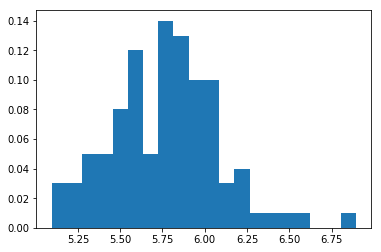

In [22]:
sepal_length_population  = iris_dataframe["sepal length (cm)"]
samples = []
means= [] 
sample_size =5

times_sample = 100

for i in range(0,times_sample):
    single_sample =sepal_length_population.sample(n = sample_size, replace="True") 
    samples.append(single_sample) 
    means.append(single_sample.mean())

vcounts1, x1 = np.histogram(means, 20)
norm_vcounts1= vcounts1/sum(vcounts1)

times_sample = 10000

for i in range(0,times_sample):
    single_sample =sepal_length_population.sample(n = sample_size, replace="True") 
    samples.append(single_sample) 
    means.append(single_sample.mean())

vcounts2, x2 = np.histogram(means, 20)
norm_vcounts2= vcounts2/sum(vcounts2)


plt.bar(x1[:-1], norm_vcounts1, x1[1]-x1[0])

### Solution code

```python
# Just run the above cell
```

### Drawing a larger sample

<BarContainer object of 20 artists>

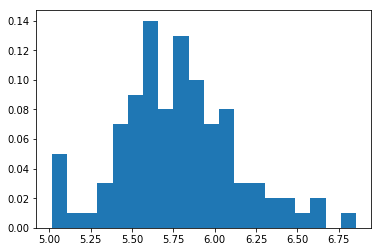

In [16]:
plt.bar(x2[:-1], norm_vcounts2, x2[1]-x2[0])

### Solution code

```python
# Just run the above cell
```